<a href="https://colab.research.google.com/github/rivanf27/2206111_PCD/blob/main/finger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install opencv-python mediapipe


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 40.7 MB/s eta 0:00:00


# **Alur Program**


*   Input Gambar Anda memberikan gambar yang berisi tangan dengan jari-jari yang terangkat. Deteksi Landmark:
*   MediaPipe mendeteksi landmark tangan (posisi ujung jari, sendi, dll.) dalam gambar.
*   Program menghitung berapa banyak jari yang ujungnya lebih tinggi dari dasarnya.
*   Gambar dengan teks "Raised Fingers: N" ditampilkan, di mana N adalah jumlah jari yang terangkat.

In [ ]:
from google.colab import files
uploaded = files.upload()


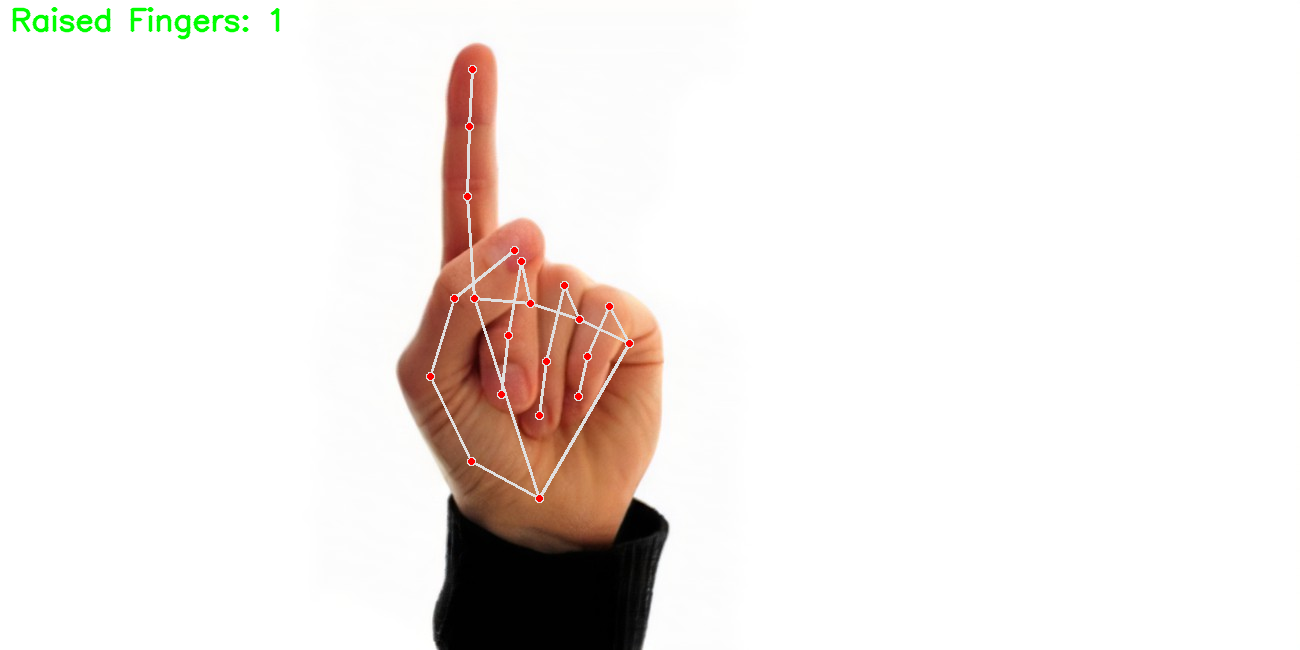

In [20]:
import cv2
import mediapipe as mp
from google.colab.patches import cv2_imshow  # Impor untuk menampilkan gambar di Google Colab

# Inisialisasi MediaPipe untuk deteksi tangan
mp_hands = mp.solutions.hands
hands = mp_hands.Hands()
mp_draw = mp.solutions.drawing_utils

# Fungsi untuk menghitung jumlah jari yang terangkat
def count_raised_fingers(image):
    # Mengubah gambar menjadi RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Proses gambar untuk deteksi tangan
    result = hands.process(image_rgb)

    if result.multi_hand_landmarks:
        for hand_landmarks in result.multi_hand_landmarks:
            # Menggambar titik tangan
            mp_draw.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)

            # Cek posisi jari-jari untuk menentukan yang terangkat
            raised_fingers = 0

            # Indeks jari dan posisi titik tangan
            finger_tips = [8, 12, 16, 20]  # Titik-titik ujung jari
            finger_bases = [5, 9, 13, 17]  # Titik dasar jari

            # Loop untuk masing-masing jari
            for tip, base in zip(finger_tips, finger_bases):
                # Mendapatkan posisi titik pada gambar
                tip_x, tip_y = hand_landmarks.landmark[tip].x, hand_landmarks.landmark[tip].y
                base_x, base_y = hand_landmarks.landmark[base].x, hand_landmarks.landmark[base].y

                # Menentukan jari terangkat jika posisi ujung lebih tinggi dari dasar
                if tip_y < base_y:  # Cek apakah ujung jari lebih tinggi dari dasar
                    raised_fingers += 1

            # Menghitung jumlah jari yang terangkat
            return raised_fingers
    return 0  # Jika tidak ada tangan terdeteksi, anggap 0 jari terangkat

# Fungsi untuk menampilkan gambar dan jumlah jari yang terangkat
def display_image_with_fingers_count(image_path):
    image = cv2.imread(image_path)
    raised_fingers = count_raised_fingers(image)

    # Tampilkan gambar dengan jumlah jari yang terangkat
    cv2.putText(image, f"Raised Fingers: {raised_fingers}", (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

    # Menampilkan gambar menggunakan cv2_imshow (karena cv2.imshow tidak bekerja di Google Colab)
    cv2_imshow(image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Ganti dengan path gambar Anda
image_path = '/content/q.jpg'
display_image_with_fingers_count(image_path)


# **1. Instalasi dan Import Library python**

Penjelasan:

cv2: Library OpenCV digunakan untuk manipulasi gambar, membaca, dan menampilkan gambar.
mediapipe: Library MediaPipe digunakan untuk deteksi fitur tangan dan landmark-nya.
google.colab.patches.cv2_imshow: Fungsi khusus untuk menampilkan gambar di Google Colab, karena cv2.imshow tidak bekerja di Colab.

In [ ]:
import cv2
import mediapipe as mp
from google.colab.patches import cv2_imshow  # Impor untuk menampilkan gambar di Google Colab


# 2. Inisialisasi MediaPipe python
Penjelasan:

mp.solutions.hands: MediaPipe menyediakan modul khusus untuk deteksi tangan dan landmark jari.
mp_hands.Hands() menginisialisasi model MediaPipe untuk mendeteksi tangan.
mp_draw: Digunakan untuk menggambar titik-titik landmark tangan (seperti ujung jari, sendi, dll.) pada gambar yang diproses.

In [ ]:
mp_hands = mp.solutions.hands
hands = mp_hands.Hands()
mp_draw = mp.solutions.drawing_utils


# 3. Fungsi Deteksi Jumlah Jari python

Penjelasan:

cv2.cvtColor: OpenCV membaca gambar dalam format BGR (Blue-Green-Red), tetapi MediaPipe memerlukan format RGB. Fungsi ini mengonversi gambar ke RGB.
hands.process: Memproses gambar menggunakan model MediaPipe untuk mendeteksi tangan dan landmark-nya.


In [ ]:
def count_raised_fingers(image):
    # Mengubah gambar menjadi RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Proses gambar untuk deteksi tangan
    result = hands.process(image_rgb)


# 4. Deteksi Landmark dan Jari Terangkat

Penjelasan:

result.multi_hand_landmarks: Jika MediaPipe mendeteksi tangan, maka landmark tangan akan tersedia.
mp_draw.draw_landmarks: Digunakan untuk menggambar koneksi dan titik landmark tangan pada gambar.
finger_tips dan finger_bases:
finger_tips: Indeks landmark ujung jari untuk jari telunjuk, jari tengah, dll.
finger_bases: Indeks landmark dasar jari untuk jari telunjuk, jari tengah, dll.


In [ ]:
if result.multi_hand_landmarks:
    for hand_landmarks in result.multi_hand_landmarks:
        mp_draw.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)

        # Cek posisi jari-jari untuk menentukan yang terangkat
        raised_fingers = 0

        # Indeks jari dan posisi titik tangan
        finger_tips = [8, 12, 16, 20]
        finger_bases = [5, 9, 13, 17]


# 5. Penentuan Jari Terangkat

Penjelasan:

landmark[tip].x dan landmark[tip].y: Mengambil koordinat X dan Y dari ujung jari (tip).
Logika Deteksi:
Jika tip_y < base_y, artinya ujung jari berada lebih tinggi dari dasar jari (jari terangkat).

In [ ]:
for tip, base in zip(finger_tips, finger_bases):
    tip_x, tip_y = hand_landmarks.landmark[tip].x, hand_landmarks.landmark[tip].y
    base_x, base_y = hand_landmarks.landmark[base].x, hand_landmarks.landmark[base].y

    if tip_y < base_y:  # Cek apakah ujung jari lebih tinggi dari dasar
        raised_fingers += 1


# 6. Menampilkan Jumlah Jari Terangkat

Penjelasan:

cv2.imread(image_path): Membaca gambar dari path yang diberikan.
cv2.putText:
Menambahkan teks pada gambar untuk menampilkan jumlah jari yang terangkat.
Parameter:
(10, 30): Koordinat tempat teks akan ditampilkan.
(0, 255, 0): Warna teks (hijau).
1: Ukuran teks.
cv2_imshow: Menampilkan gambar dalam notebook Google Colab.


In [ ]:
def display_image_with_fingers_count(image_path):
    image = cv2.imread(image_path)
    raised_fingers = count_raised_fingers(image)

    cv2.putText(image, f"Raised Fingers: {raised_fingers}", (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

    cv2_imshow(image)  # Menampilkan gambar di Colab


# 7. Menjalankan Program

Penjelasan:

image_path: Path ke file gambar yang ingin diuji.
display_image_with_fingers_count: Fungsi untuk mendeteksi jumlah jari yang terangkat dan menampilkan gambar hasil deteksi.


In [ ]:
image_path = '/content/q.jpg'
display_image_with_fingers_count(image_path)
